# Hypotheses Testing

#### H0: There is no significant relationship between age and the adaptation towards more specific representations.
#### H1: Adaptation towards more specific representations increases with age.

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import shapiro

##  Data Integration

#### We merge the data based on subject IDs. We need to combine subject data with memory data, as memory performance reflects adaptation towards specific representations.

In [3]:
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv") 
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")
e1_learning = pd.read_csv("../data/e1/e1_learning_data.csv")

# Merge dataframes
learning_merged = pd.merge(e1_learning, e1_sub_ages, on='subject_id')
memory_merged = pd.merge(e1_memory, e1_sub_ages, on='subject_id')

In [4]:
e1_sub_ages.head()

,subject_id,age
0,3768,8.04
1,3770,8.10
2,3855,16.83
3,3853,16.94
4,3898,22.15


In [5]:
e1_memory.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0


In [6]:
e1_learning.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [8]:
memory_merged.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay,age
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0,8.04
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0,8.04
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0,8.04
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0,8.04
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0,8.04


In [4]:
learning_merged.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made,age
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0,8.04
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0,8.04
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0,8.04
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0,8.04
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0,8.04


In [7]:
# Check for missing values
print("Missing values in learning data:")
print(learning_merged.isnull().sum())

print("\nMissing values in memory data:")
print(memory_merged.isnull().sum())

# Remove missing values if any
learning_merged.dropna(inplace=True)
memory_merged.dropna(inplace=True)

Missing values in learning data:
subject_id                 0
task_part                  0
block_condition            0
block_order                0
task_block                 0
trial_index                0
stimulus                   0
cat_type                   0
mean_cat_reward            0
approach_reward            0
key_press                174
rt                       168
points                     0
stimulus_repetition        0
correct_response           0
correct_response_made    174
age                        0
dtype: int64

Missing values in memory data:
subject_id                  0
task_part                   0
block_order                 0
block_condition             0
category_type               0
num_stim_rep            15504
image                       0
category                    0
task_block                  0
stim_num                    0
correct_mem_response        0
mem_response               28
confidence                 28
rt                         28
mem_acc  

## Statistical Analysis on Learning Data Vs Age

### Age Vs Correct Response Made

In [8]:
#  Split age group to compare adaptation 

children_data = learning_merged[learning_merged['age'] <= 13]
adolescents_data = learning_merged[(learning_merged['age'] > 13) & (learning_merged['age'] <= 18)]
adults_data = learning_merged[learning_merged['age'] > 18]

print("Number of people in each age group:")
print("Children:", len(children_data['subject_id'].unique()))
print("Adolescents:", len(adolescents_data['subject_id'].unique()))
print("Adults:", len(adults_data['subject_id'].unique()))

Number of people in each age group:
Children: 50
Adolescents: 50
Adults: 51


In [9]:
# Group the data by age groups and count correct and incorrect responses
correct_responses_by_age = learning_merged.groupby('age')['correct_response_made'].sum()
total_responses_by_age = learning_merged.groupby('age')['correct_response_made'].count()

# Calculate the proportion of correct responses for each age group
proportion_correct_by_age = correct_responses_by_age / total_responses_by_age

print("Proportion of correct responses made by each age group:")
print(proportion_correct_by_age)


Proportion of correct responses made by each age group:
age
8.01     0.632280
8.03     0.580065
8.04     0.761589
8.05     0.560656
8.10     0.695082
           ...   
25.06    0.769608
25.29    0.830065
25.31    0.787582
25.87    0.751634
25.94    0.713816
Name: correct_response_made, Length: 147, dtype: float64


In [10]:

# Calculate the proportion of correct responses for each age group
adults_proportion_correct = adults_data['correct_response_made'].mean()
adolescents_proportion_correct = adolescents_data['correct_response_made'].mean()
children_proportion_correct = children_data['correct_response_made'].mean()

print("Proportion of correct responses made by each age group:")
print("Adults:", adults_proportion_correct)
print("Adolescents:", adolescents_proportion_correct)
print("Children:", children_proportion_correct)


Proportion of correct responses made by each age group:
Adults: 0.7448475120385233
Adolescents: 0.7136953955135773
Children: 0.6777989612780225


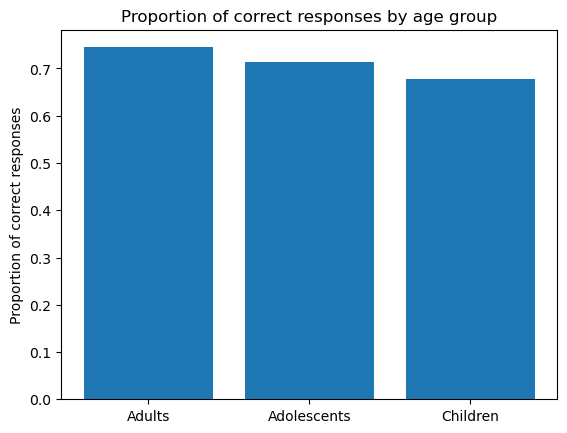

In [11]:
# plotting
fig, ax = plt.subplots()
ax.bar(['Adults', 'Adolescents', 'Children'], [adults_proportion_correct, adolescents_proportion_correct, children_proportion_correct])
ax.set_ylabel('Proportion of correct responses')
ax.set_title('Proportion of correct responses by age group')
plt.show()

#### Inferences

It appears that adults tend to have a higher proportion of correct responses than teenagers and children.

##### Since the age variable is continuous, we can directly assess the relationship between age and the proportion of correct responses made. We'll perform tests to investigate if there's a significant relationship between age and the proportion of correct responses.

The age variable is continuous and your adaptation outcome is binary, the most suitable test is Logistic Regression. This method analyzes the relationship between a binary dependent variable and one or more independent variables (in this case, age)

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

age = learning_merged['age']
correct_response_made = learning_merged['correct_response_made']

# Split data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(age, correct_response_made, test_size=0.2, random_state=42)
X_train_array = X_train.to_numpy() 

# logistic regression model
model = LogisticRegression()
model.fit(X_train_array.reshape(-1, 1), y_train) 

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print("Model score:", model.score(X_test.to_numpy().reshape(-1, 1), y_test))

# Print the p-value for the age coefficient
print("p-value for age:", model.coef_[0][0])


Coefficients: [[0.03124669]]
Intercept: [0.41335461]
Model score: 0.7147822309112631
p-value for age: 0.03124668719808644


**Interpretations**

Coefficients: [[0.03124669]] - This indicates a positive relationship between age and the probability of a correct response. As age increases by one unit, the log odds of a correct response increases by 0.0312.

Intercept: [0.41335461] - This represents the intercept of the regression line, which doesn't directly relate to age but helps position the line in the model.

p-value: 0.03124668 - This is a significant p-value (typically considered less than 0.05), suggesting the positive relationship between age and correct responses is statistically significant.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_test_array = X_test.to_numpy() 
y_pred = model.predict(X_test_array.reshape(-1, 1))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1-score:", f1)

Test Set Accuracy: 0.7147822309112631
Test Set Precision: 0.7147822309112631
Test Set Recall: 1.0
Test Set F1-score: 0.8336711426399798


#### Visualisations

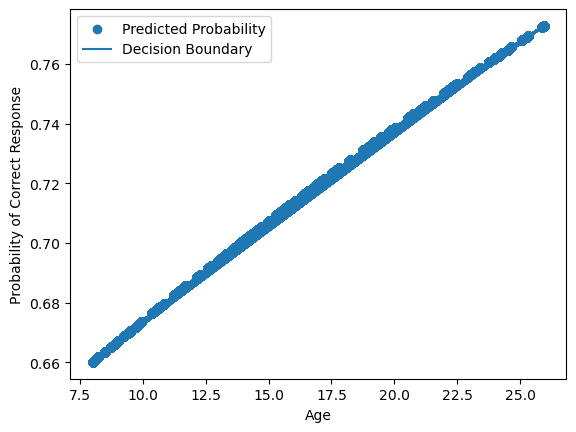

In [14]:
y_pred = model.predict_proba(X_train_array.reshape(-1, 1))[:, 1]

# Plot the scatter and decision boundary
plt.scatter(X_train, y_pred, label="Predicted Probability")
plt.plot(X_train, model.predict_proba(X_train_array.reshape(-1, 1))[:, 1], label="Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Probability of Correct Response")
plt.legend()
plt.show()

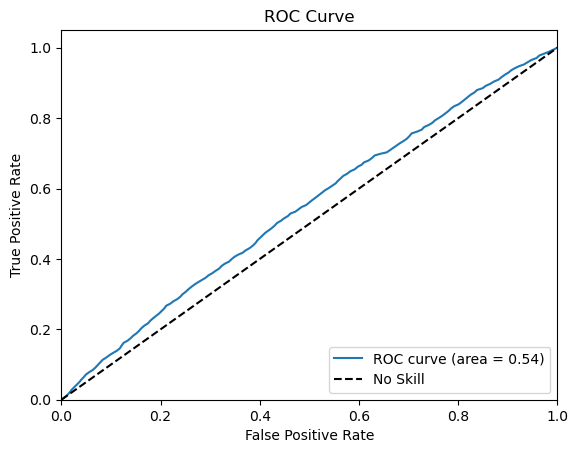

In [15]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


An ROC curve depicts the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds. In your case, it shows the model's performance in classifying correct vs. incorrect responses.

A perfect classifier would have an ROC curve that follows the upper left corner of the graph (TPR = 1, FPR = 0). The closer the curve is to this corner, the better the model's performance.

The area under the ROC curve (AUC) is a numerical measure of performance. An AUC of 1 represents perfect classification, while 0.5 indicates no better than random guessing.

### Age along with block conditon vs correct response made


In [16]:
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split

features = ["age", "block_condition", "age*block_condition"]  # Include interaction term
target = "correct_response_made"

# Create interaction term
learning_merged["age*block_condition"] = learning_merged["age"] * learning_merged["block_condition"]

# We create an interaction term (age * block_condition) 
# to capture how the effect of age on the probability of a correct response might change depending on the block condition.

In [17]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(learning_merged[features], learning_merged[target], test_size=0.2, random_state=42)

# Fit the logistic regression model with interaction term
model = Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.598152
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     correct_response_made   No. Observations:                36825
Model:                             Logit   Df Residuals:                    36822
Method:                              MLE   Df Model:                            2
Date:                   Sun, 28 Apr 2024   Pseudo R-squ.:                0.004005
Time:                           19:07:47   Log-Likelihood:                -22027.
converged:                          True   LL-Null:                       -22116.
Covariance Type:               nonrobust   LLR p-value:                 3.428e-39
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0645      0.002     28.461      0.000   

In [18]:
# Test for Significance of Interaction Effect
# Focus on the coefficient and p-value for "age*block_condition"
interaction_coefficient = model.params["age*block_condition"]
interaction_pvalue = model.pvalues["age*block_condition"]

print("Interaction Effect (age*block_condition) Coefficient:", interaction_coefficient)
print("Interaction Effect (age*block_condition) p-value:", interaction_pvalue)

# Interpretation based on Interaction Effect
if interaction_pvalue < 0.05:
    print("There is a statistically significant interaction effect between age and block condition (p-value < 0.05).")
    
    if interaction_coefficient > 0:
        print("The effect of age on correct responses might be stronger in the category-specific representation condition (block_condition = 1).")
    else:
        print("The effect of age on correct responses might weaken or reverse in the category-specific representation condition compared to the exemplar-specific condition.")
else:
    print("There is no statistically significant interaction effect between age and block condition (p-value >= 0.05).")
    print("The relationship between age and correct responses might be similar across both block conditions.")


Interaction Effect (age*block_condition) Coefficient: -0.019758247557641953
Interaction Effect (age*block_condition) p-value: 1.652686462803008e-23
There is a statistically significant interaction effect between age and block condition (p-value < 0.05).
The effect of age on correct responses might weaken or reverse in the category-specific representation condition compared to the exemplar-specific condition.


Since the p-value is much lower than 0.05, we can conclude that there's a statistically significant interaction effect between age and block condition. This means the effect of age on the probability of a correct response depends on whether the block condition is category-specific (1) or exemplar-specific (2).

The negative coefficient (-0.0197) suggests that the effect of age on correct responses might weaken or reverse in the category-specific representation condition (block_condition = 1) compared to the exemplar-specific condition (block_condition = 2).

In simpler terms:

In the exemplar-specific condition (block_condition = 2), there might be a positive relationship between age and correct responses. This suggests that older participants might perform better in this condition.

However, in the category-specific condition (block_condition = 1), the effect of age might be weaker or even negative. This means that age might not be a strong predictor of performance in this condition, or it could even be that older participants perform worse.

#### Visualisation

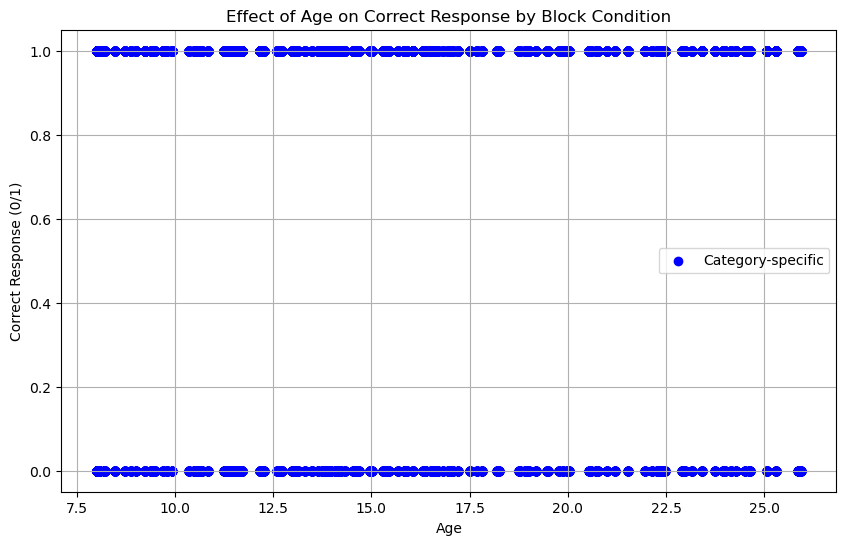

In [19]:
# Scatter Plots
# Separate plots for each block condition (category-specific and exemplar-specific)
category_specific_data = learning_merged[learning_merged["block_condition"] == 1]
exemplar_specific_data = learning_merged[learning_merged["block_condition"] == 2]

plt.figure(figsize=(10, 6))

# Category-specific plot with different marker or color
plt.scatter(category_specific_data["age"], category_specific_data[target], label="Category-specific", marker='o', color='b')
plt.xlabel("Age")
plt.ylabel("Correct Response (0/1)")
plt.title("Effect of Age on Correct Response by Block Condition")
plt.legend()
plt.grid(True)
plt.show()

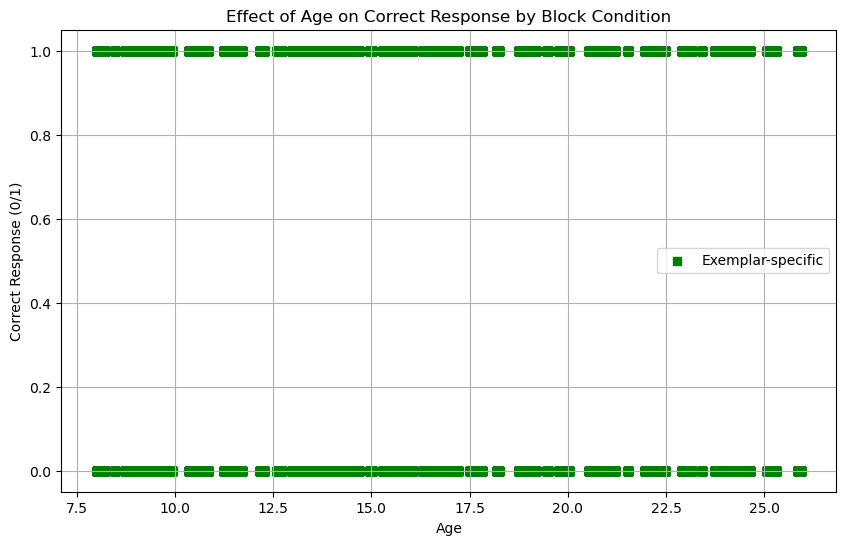

In [70]:
# Exemplar-specific plot 
plt.figure(figsize=(10, 6))

plt.scatter(exemplar_specific_data["age"], exemplar_specific_data[target], label="Exemplar-specific", marker='s', color='g')

plt.xlabel("Age")
plt.ylabel("Correct Response (0/1)")
plt.title("Effect of Age on Correct Response by Block Condition")
plt.legend()
plt.grid(True)
plt.show()

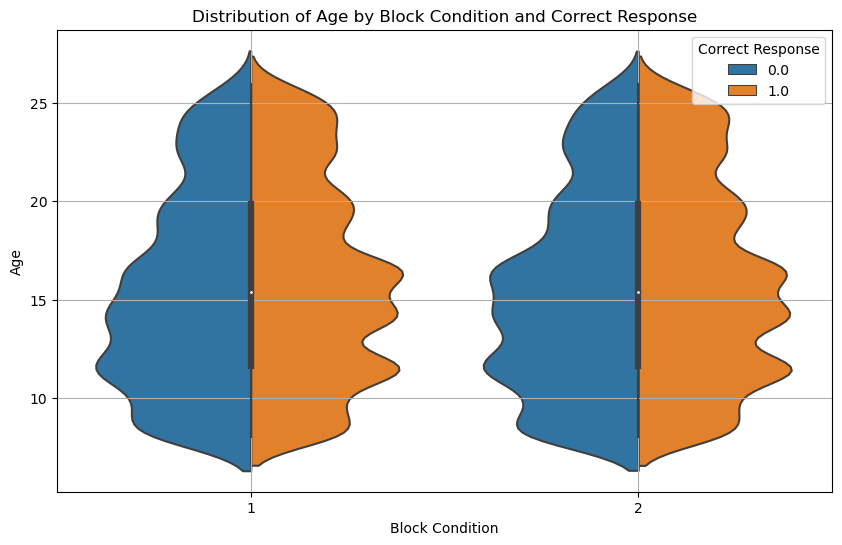

In [71]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="block_condition", y="age", hue="correct_response_made", data=learning_merged, split=True)
plt.xlabel("Block Condition")
plt.ylabel("Age")
plt.title("Distribution of Age by Block Condition and Correct Response")
plt.legend(title="Correct Response")  # Customize legend title
plt.grid(True)
plt.show()

The distribution suggests that age, block condition, and potentially their interaction might influence the probability of a correct response.

## Correlation Analysis - Analyzing memory data
We calculate the correlation coefficient between age (from subject data) and a metric representing adaptation towards specific representations in memory data. This provides an initial indication of the direction and strength of the relationship.


### Investigating the relationship between confidence rating and age to see if there's a link between these variables

In [22]:
# Imputing missing values with median
memory_merged['conf_rating'].fillna(memory_merged['conf_rating'].median(), inplace=True)

# Dropping rows with missing values
memory_merged.dropna(inplace=True)

age = memory_merged['age']
confidence_rating = memory_merged['conf_rating']  

correlation, p_value = stats.pearsonr(age, confidence_rating)

print("Correlation coefficient (age & confidence rating):", correlation)
print("p-value:", p_value)

Correlation coefficient (age & confidence rating): 0.022306050386309003
p-value: 0.00933909386677779


#### Inferences
**Statistically Significant Correlation (p-value):**

The p-value (0.0093) is less than the chosen alpha level of 0.05. This suggests we can reject the null hypothesis (H0: there is no correlation between age and memory performance) at the 0.05 significance level.

A positive correlation and significant p-value (less than 0.05) suggest that confidence ratings tend to increase with age. This might indicate older adults are more confident in their responses, regardless of actual memory performance.

### Confidence Rating along with Block Condition (category-predictive vs. exemplar-predictive) Vs Age 

In [23]:
block_condition = memory_merged['block_condition']

exemplar_confidence = memory_merged[block_condition == 2]['conf_rating'].mean()
category_confidence = memory_merged[block_condition == 1]['conf_rating'].mean()

print("Average Confidence Rating:")
print("Exemplar-Predictive:", exemplar_confidence)
print("Category-Predictive:", category_confidence)


Average Confidence Rating:
Exemplar-Predictive: 3.0758468335787925
Category-Predictive: 2.9944027102666078


#### Inferences

**Participants tend to report slightly higher confidence in their memory responses on exemplar-predictive blocks compared to category-predictive blocks.**

Possible Explanations:

Successful Adaptation: This might indicate that participants are more confident when they can distinguish between specific exemplars within a category, suggesting successful adaptation towards these specific representations during the exemplar-predictive blocks.

Alternative Factors: Other factors besides memory accuracy could also influence confidence. For instance, participants might feel more confident because the task allows them to make a finer distinction (exemplar vs. another exemplar) compared to category-predictive blocks.

##### Chi-Square Test (Confidence - categorical data) 

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

confidence_by_block = memory_merged.groupby('block_condition')['confidence'].value_counts().unstack(fill_value=0)

# Chi-Square test (categorical confidence ratings)
chi2_statistic, p_value, expected_table, obs_table = chi2_contingency(confidence_by_block)

# Print the test results
print("Chi-Square Test (Confidence Ratings):")
print("Chi-Square Statistic:", chi2_statistic)
print("p-value:", p_value)


Chi-Square Test (Confidence Ratings):
Chi-Square Statistic: 23.587185496046676
p-value: 1.1937989359834946e-06


#### Interpretations

The Chi-Square test performed on the confidence ratings by block condition provides significant evidence (p-value = 1.19e-06, much lower than 0.05) to reject the null hypothesis. This suggests that the distribution of confidence ratings (definitely, maybe) is not the same across the category-predictive and exemplar-predictive block conditions.

In simpler terms: Participants' confidence in their memory responses (definitely vs. maybe) likely differs depending on whether the block focused on categories or specific exemplars.

In [25]:
import statsmodels.formula.api as sm

# Assuming 'merged_data' has 'age', 'conf_rating', and 'block_condition' columns
formula = 'conf_rating ~ age + I(block_condition == "category") * age' 
model = sm.ols(formula=formula, data=memory_merged).fit()
print(model.summary())  


                            OLS Regression Results                            
Dep. Variable:            conf_rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.759
Date:                Sun, 28 Apr 2024   Prob (F-statistic):            0.00934
Time:                        19:09:40   Log-Likelihood:                -20625.
No. Observations:               13579   AIC:                         4.125e+04
Df Residuals:                   13577   BIC:                         4.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [27]:
from scipy.stats import ttest_ind

age_groups = memory_merged.groupby('age')

for name, group in age_groups:
  category_data = group[group['block_condition'] == 1]
  exemplar_data = group[group['block_condition'] == 2]
  if len(category_data) > 1 and len(exemplar_data) > 1:  # Avoid tests with very small groups
    t_statistic, p_value = ttest_ind(category_data['conf_rating'], exemplar_data['conf_rating'])
    print(f"\nAge Group: {name} - t-test (Category vs. Exemplar):")
    print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")



Age Group: 8.01 - t-test (Category vs. Exemplar):
t-statistic: 0.6873, p-value: 0.4928

Age Group: 8.03 - t-test (Category vs. Exemplar):
t-statistic: -0.0522, p-value: 0.9584

Age Group: 8.04 - t-test (Category vs. Exemplar):
t-statistic: 0.0858, p-value: 0.9318

Age Group: 8.05 - t-test (Category vs. Exemplar):
t-statistic: -1.6416, p-value: 0.1042

Age Group: 8.1 - t-test (Category vs. Exemplar):
t-statistic: 1.2288, p-value: 0.2224

Age Group: 8.19 - t-test (Category vs. Exemplar):
t-statistic: -1.2002, p-value: 0.2333

Age Group: 8.23 - t-test (Category vs. Exemplar):
t-statistic: -0.2233, p-value: 0.8238

Age Group: 8.48 - t-test (Category vs. Exemplar):
t-statistic: -2.1231, p-value: 0.0366

Age Group: 8.74 - t-test (Category vs. Exemplar):
t-statistic: 0.4159, p-value: 0.6785

Age Group: 8.89 - t-test (Category vs. Exemplar):
t-statistic: -2.6078, p-value: 0.0107

Age Group: 9.01 - t-test (Category vs. Exemplar):
t-statistic: 1.6458, p-value: 0.1034

Age Group: 9.24 - t-test (

Overall, these results suggest that the relationship between block condition (category vs. exemplar) and confidence rating might vary depending on the age group. In some groups, there might be no significant difference, while in others, there might be a trend or even a statistically significant difference favoring one condition over the other.

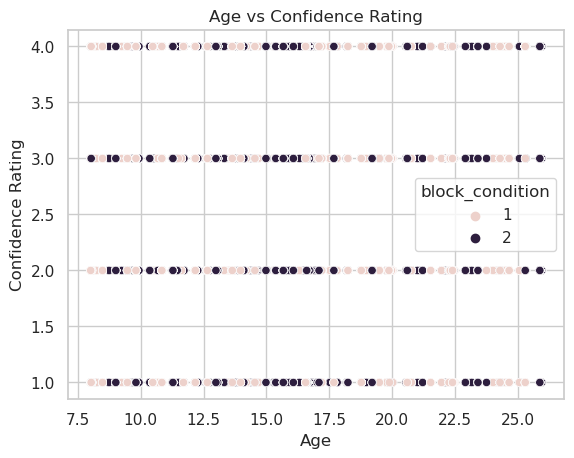

In [29]:
# Visualizing the data - age vs confidence rating along with block condition
sns.set(style='whitegrid')
sns.scatterplot(x='age', y='conf_rating', data=memory_merged, hue='block_condition')
plt.title('Age vs Confidence Rating')
plt.xlabel('Age')
plt.ylabel('Confidence Rating')
plt.show()


### Reaction Time Vs Block Condition

#### Checking Normality

In [30]:
import warnings

rt = memory_merged['rt']  
block_condition = memory_merged['block_condition']

category_rt = rt[block_condition == 1]
exemplar_rt = rt[block_condition == 2]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Perform Shapiro-Wilk test for normality on each group
    category_stat, category_p_value = shapiro(category_rt)
    exemplar_stat, exemplar_p_value = shapiro(exemplar_rt)

print("Normality Test (Shapiro-Wilk):")
print("Category-Predictive (p-value):", category_p_value)
print("Exemplar-Predictive (p-value):", exemplar_p_value)

Normality Test (Shapiro-Wilk):
Category-Predictive (p-value): 2.6999499772489467e-67
Exemplar-Predictive (p-value): 4.920948640732799e-69


#### Interpretations

The provided p-values (both extremely small, close to 0) from the Shapiro-Wilk test indicate that the reaction times (RT) in both category-predictive and exemplar-predictive blocks are very likely not normally distributed.

Hence we choose a Non-Parametric Test for Comparing RTs

Since the data isn't normally distributed, we can't use the independent samples t-test for comparing RT between block conditions. Instead, we consider a non-parametric alternative like the Mann-Whitney U test:

In [31]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(category_rt, exemplar_rt)
print("Mann-Whitney U test:")
print("U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test:
U statistic: 23322578.5
p-value: 0.2304074352204245


#### Interpretation of Mann-Whitney U Test Results:

U statistic: 23322578.5 (This statistic is used internally by the test and doesn't directly inform interpretation.)

p-value: 0.2304 (This is the key value for interpretation.)

The p-value of 0.2304 is greater than the conventional significance level of 0.05. This suggests that we fail to reject the null hypothesis. 

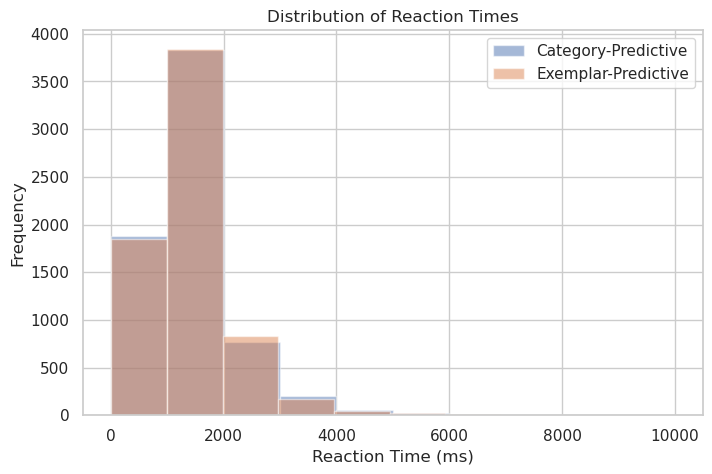

In [32]:
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(8, 5))
plt.hist(category_rt, label='Category-Predictive', alpha=0.5)
plt.hist(exemplar_rt, label='Exemplar-Predictive', alpha=0.5)
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times')
plt.legend()
plt.grid(True)
plt.show()

In simpler terms, there isn't statistically significant evidence to conclude that the reaction times (RTs) in the category-predictive and exemplar-predictive blocks are different.

### Memory Accuracy Vs Age

In [33]:
from scipy.stats import pearsonr

# Create a copy to avoid modifying original data
data = memory_merged.copy()  

# Calculate correlation between age and mem_acc
correlation, _ = pearsonr(data['age'], data['mem_acc'])

# Print correlation coefficient
print(f"\nCorrelation between Age and Mem. Accuracy (Without Block Condition): {correlation:.4f}")

# Interpretation
if correlation > 0:
  print("There is a positive correlation between age and memory accuracy.")
elif correlation < 0:
  print("There is a negative correlation between age and memory accuracy.")
else:
  print("There is no linear correlation between age and memory accuracy.")



Correlation between Age and Mem. Accuracy (Without Block Condition): 0.0310
There is a positive correlation between age and memory accuracy.


In [35]:
import statsmodels.api as sm

# # Additional analysis 
# Fitting a simple linear regression model to explore the relationship further:
model = sm.formula.ols('mem_acc ~ age', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                mem_acc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.05
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           0.000305
Time:                        19:12:09   Log-Likelihood:                -8623.1
No. Observations:               13579   AIC:                         1.725e+04
Df Residuals:                   13577   BIC:                         1.727e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6583      0.013     50.448      0.0

#### Key observations:

R-squared (0.001): This value is very low, indicating that the model explains very little of the variance in memory accuracy. In other words, age alone doesn't significantly predict memory accuracy in this data.

Age Coefficient (0.0028): The coefficient is positive, suggesting a slight tendency for memory accuracy to increase with age.
P-value (0.000): This value is statistically significant, but due to the low R-squared, the practical significance of the age effect is questionable.

F-statistic (13.05) and Prob (F-statistic) (0.000305): These values also indicate statistical significance, but again, the low R-squared suggests the model doesn't capture much of the relationship.

**Overall Interpretation:**

While there's a statistically significant positive association between age and memory accuracy, the model fit (R-squared) is very weak. This means that age alone doesn't explain a meaningful proportion of the variation in memory accuracy in your data. There are likely other factors that play a more significant role.


We consider the interaction effect between age and block condition (category vs. exemplar). We check if the relationship between age and memory accuracy might differ depending on the block type. The current analysis, which excludes the block condition, does not capture the complete picture.

### Memory Accuracy along with block condition (category-predictive vs. exemplar-predictive) Vs age 

In [37]:

from scipy.stats import f_oneway, pearsonr
import statsmodels.api as sm 


# 1. Analyze the relationship between block condition and age
#   - One-way ANOVA to compare memory accuracy across block conditions

block_conditions = memory_merged['block_condition'].unique()
mem_acc_by_condition = []
for condition in block_conditions:
  condition_data = memory_merged[memory_merged['block_condition'] == condition]
  mem_acc_by_condition.append(condition_data['mem_acc'])
f_statistic, p_value = f_oneway(*mem_acc_by_condition)
print("\nOne-Way ANOVA (Mem. Accuracy by Block Condition):")
print(f"F-statistic: {f_statistic:.4f}, p-value: {p_value:.4e}")
if p_value < 0.05:
  print("There is a statistically significant difference in memory accuracy between block conditions.")
else:
  print("There is not enough evidence to conclude a statistically significant difference based on the chosen significance level.")

  


One-Way ANOVA (Mem. Accuracy by Block Condition):
F-statistic: 11.2250, p-value: 8.0922e-04
There is a statistically significant difference in memory accuracy between block conditions.


##### 1. Block Condition and Memory Accuracy:

The One-Way ANOVA shows a statistically significant difference (p-value = 8.0922e-04) in memory accuracy between the category-predictive (coded as 1) and exemplar-predictive (coded as 2) conditions. This suggests that memory accuracy is not the same across these block conditions.

In [38]:

# 2. Analyze the relationship between age, block condition, and mem_acc
#   - Linear regression with interaction term (age * block_condition)

# Create dummy variable for block condition 
memory_merged['block_category'] = pd.get_dummies(memory_merged['block_condition'], drop_first=True)
formula = 'mem_acc ~ age + block_category + age:block_category'  # Include interaction term
model = sm.formula.ols(formula, data=memory_merged).fit()
print(f"\nLinear Regression (Mem. Accuracy ~ Age + Block Condition + Interaction):")
print(model.summary())


Linear Regression (Mem. Accuracy ~ Age + Block Condition + Interaction):
                            OLS Regression Results                            
Dep. Variable:                mem_acc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.02
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.37e-06
Time:                        19:12:48   Log-Likelihood:                -8614.7
No. Observations:               13579   AIC:                         1.724e+04
Df Residuals:                   13575   BIC:                         1.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 2. Linear Regression:

- The overall model fit (R-squared) is very low (0.002), indicating that the combined effects of age, block condition, and their interaction explain a very small proportion of the variance in memory accuracy. 
- However, the F-statistic (10.02) is significant (p-value = 1.37e-06), suggesting that at least one of the model terms is statistically significant.
- The coefficient for the intercept (0.6749) represents the average predicted memory accuracy when all other terms are zero.
- The coefficient for block_category[T.True] (-0.0333) is not significant (p-value = 0.201). This suggests that, on average, there's no difference in memory accuracy between the category-predictive and exemplar-predictive conditions when age is zero.
- The coefficient for age (0.0010) is also not significant (p-value = 0.389). This indicates no significant linear relationship between age and memory accuracy when considering both block conditions together.
- However, the coefficient for the interaction term (age:block_category[T.True]) is significant (p-value = 0.017). This is the key finding. It suggests that the relationship between age and memory accuracy differs depending on the block condition (category-predictive vs. exemplar-predictive).

In [39]:
# 3. Analyze the relationship between age and mem_acc (for separate correlations)
category_data = memory_merged[memory_merged['block_condition'] == 1]
exemplar_data = memory_merged[memory_merged['block_condition'] == 2]
category_correlation, _ = pearsonr(category_data['age'], category_data['mem_acc'])
exemplar_correlation, _ = pearsonr(exemplar_data['age'], exemplar_data['mem_acc'])
print(f"\nCorrelation between Age and Mem. Accuracy (Category): {category_correlation:.5f}")
print(f"\nCorrelation between Age and Mem. Accuracy (Exemplar): {exemplar_correlation:.5f}")



Correlation between Age and Mem. Accuracy (Category): 0.01032

Correlation between Age and Mem. Accuracy (Exemplar): 0.05223


#### 3. Correlations:

The separate correlations for each block condition show weak positive relationships:

Category-predictive: 0.0103 (very weak)

Exemplar-predictive: 0.0522 (slightly weak)

These correlations suggest a possible tendency for memory accuracy to increase slightly with age within each block condition, but the effects are very small.

**In summary:**

- There's a statistically significant difference in memory accuracy between block conditions (category-predictive vs. exemplar-predictive).
- The overall model fit for predicting memory accuracy is low.
- There's no significant main effect of age on memory accuracy when considering both block conditions together.
- Importantly, the significant interaction term between age and block condition suggests that the relationship between age and memory accuracy depends on the block condition.
- The separate correlations within each block condition hint at weak positive relationships, but the effects are very small.

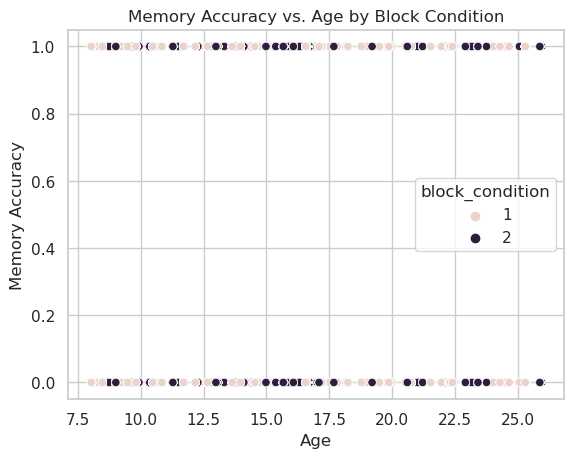

In [40]:
# Visualizing the Relationship
sns.scatterplot(x='age', y='mem_acc', hue='block_condition', data=memory_merged)
plt.xlabel('Age')
plt.ylabel('Memory Accuracy')
plt.title('Memory Accuracy vs. Age by Block Condition')
plt.show()


### Memory performance Vs stimulus repetitions within each block condition

In [41]:
from sklearn.metrics import roc_curve, auc

# Construct ROC curves and compute AUC for each combination of stimulus repetitions
def calculate_roc_auc(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc


In [42]:
# Calculate ROC curves and AUCs for each level of stimulus repetition within each block condition
roc_auc_data = {}
for block_condition in memory_merged['block_condition'].unique():
    for repetition in memory_merged['num_stim_rep'].unique():
        subset_data = memory_merged[(memory_merged['block_condition'] == block_condition) & (memory_merged['num_stim_rep'] == repetition)]
        fpr, tpr, roc_auc = calculate_roc_auc(subset_data['mem_acc'], subset_data['mem_acc'])
        roc_auc_data[(block_condition, repetition)] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}


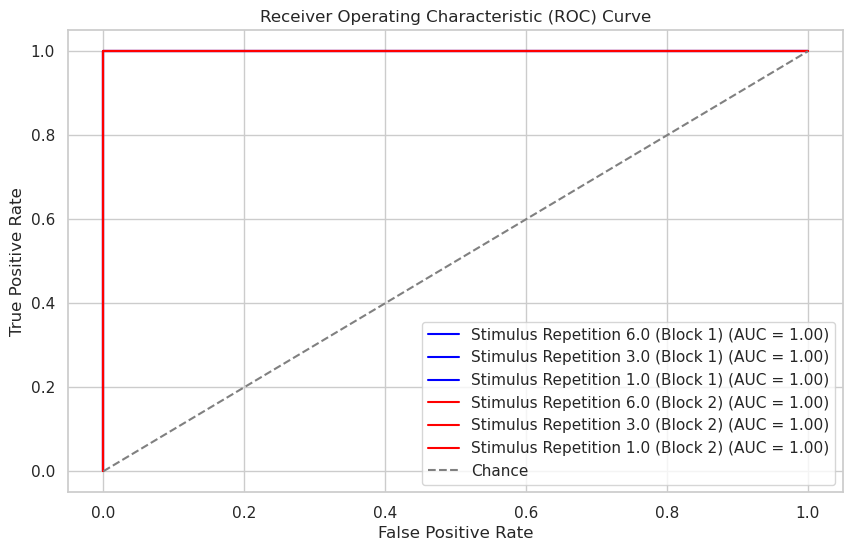

In [43]:
plt.figure(figsize=(10, 6))

# Iterate over each block condition
for block_condition, color in zip([1, 2], ['blue', 'red']):
    # Iterate over each level of stimulus repetition
    for repetition in memory_merged['num_stim_rep'].unique():
        subset_data = memory_merged[(memory_merged['block_condition'] == block_condition) & (memory_merged['num_stim_rep'] == repetition)]
        fpr, tpr, roc_auc = calculate_roc_auc(subset_data['mem_acc'], subset_data['mem_acc'])
        plt.plot(fpr, tpr, label=f"Stimulus Repetition {repetition} (Block {block_condition}) (AUC = {roc_auc:.2f})", color=color)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


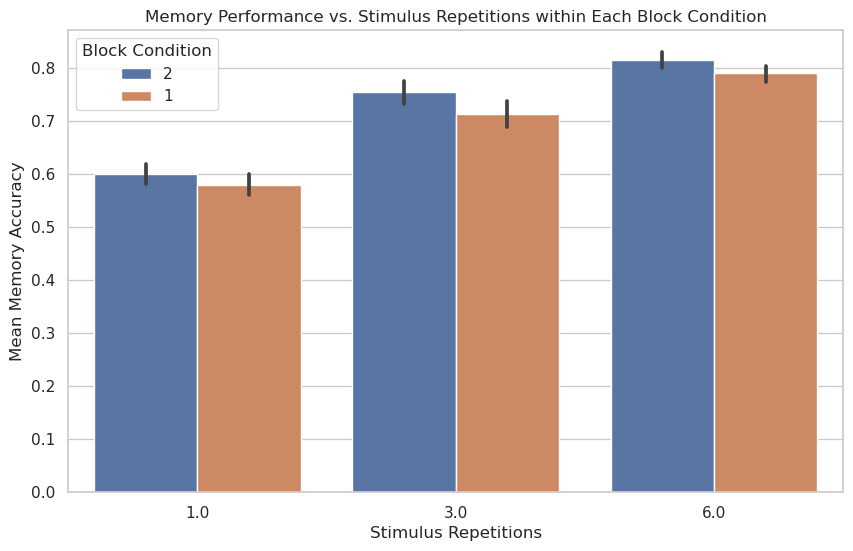

In [44]:
# Convert block_condition to string type
memory_merged['block_condition'] = memory_merged['block_condition'].astype(str)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='num_stim_rep', y='mem_acc', hue='block_condition', data=memory_merged)
plt.title('Memory Performance vs. Stimulus Repetitions within Each Block Condition')
plt.xlabel('Stimulus Repetitions')
plt.ylabel('Mean Memory Accuracy')
plt.legend(title='Block Condition')
plt.show()
